## Import Libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [22]:
boston=datasets.load_boston()
bosData=pd.DataFrame(boston.data, columns = boston.feature_names)
bosData['PRICE'] = boston.target
bosData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
bosData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [24]:
bosData.isnull().values.any()

False

## Splitting the data as training data and testing data

In [25]:
x = bosData.drop('PRICE', axis = 1)
y = bosData['PRICE']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## Fitting the training and testing data into linear regression model

In [26]:
reg= LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

## Calculating the root mean square error for training and testing data 

In [28]:
y_train_predict = reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("The performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is : {}'.format(r2))

The performance for training set
RMSE is 4.6520331848801675
R2 score is : 0.7508856358979673


In [29]:
y_pred = reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("The performance for testing set")
print("Root Mean Squared Error: {}".format(rmse))
print('R2 score is : {}'.format(r2))

The performance for testing set
Root Mean Squared Error: 4.928602182665345
R2 score is : 0.6687594935356309


## Visualization of Actual Prices vs Predicted Prices 

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

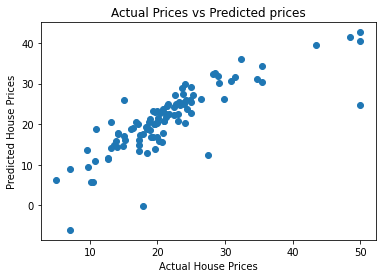

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Prices vs Predicted prices")